
# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA EN ESTA CELDA TU RESPUESTA**

Sin mirar el dataset, los datos intuitivos que debería tener para resolver el problema son los siguientes:

**Metros cuadrados disponibles (total) y contruidos (cubiertos)**, el tamaño de la propiedad influye mucho en el precio de la misma, tanto el total como los cubiertos.

**El sector donde está ubicado y el estrato del sector**: son variables cualitativa que influiría en el comprador y vendedor, ya que es una referencia en precios de ventas de los mas cercanos y confort de la zona.

**La catidad de habitaciones,salas y baños que tenga las propiedades**: son variables directas que afectan al precio.

su posible **precio de venta**

y si es **residencial o PH** influye ya que afecta directamente en la forma de vivir y los gastos. 

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [5]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
#Librerias
import numpy as np
# Manipulación del dataframe
import pandas as pd
# exploración de datos
import matplotlib.pyplot as plt
#exploración de datos
import seaborn as sns
# Mejorar el estilo de los gráficos
sns.set()
# fechas
import datetime #Para manipular fechas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [5]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
#cargando datos
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
data.head(5) #Mostrando primeras 5 instancias


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [6]:
data.tail() #Mostrando las últimas 5 instancias

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta
146659,2019-07-31,2019-10-12,2019-07-31,-34.444760,-58.981885,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,3.0,2.0,1.0,75.0,75.0,98000.0,USD,Departamento en venta en Manzanares Chico,"Departamento en el Barrio Manzanares Chico , e...",Departamento,Venta


In [7]:
print(data.shape) #Tamaño del data frame
print(data.columns) #Titulos de las columnas
# hay 146.660 filas o instancias y 19 columnas


(146660, 19)
Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')


In [8]:
data.info() #Información del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

Es importante saber que significa cada columna:

**start_date** : da una fecha de alta del aviso, considero que este dato no es relevante para la variable a predecir. Sin embargo, lo dejaré en consideración. Ya que la linea de tiempo proporciona un buen análisis.
**end_date**: Fecha de baja del aviso.
**created_on**: Fecha de alta de la primera versión del aviso.
**lat**: Latitud, considero no relevante para el analisis del proyecto, lo miraremos con objetividad en la relación con la variable a predecir.
**lon**: Longitud
**l1**: País
**l2**: Provincia
**l3**: Ciudad
**rooms**: Cantidad de ambientes
**bedrooms**: Cantidad de dormitorios
**bathrooms**: Cantidad de baños
**Surface_total**: Superficie total en m2, se refiere al área total
**surface_covered**: Superficie Cubierta en m2, se refiere al área construida.
**price**: Precio publicado en el anuncio
**currency**: Moneda del precio publicado
**title**: Título del anuncio
**description**: Descripción del anuncio
**property_type**: Tipo de propiedad; (Casa, Departamento, PH)
**operation_type**: Tipo de operación; (Venta, Alquiler)


In [9]:
data.dtypes

start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object

In [10]:
data.count()

start_date         146660
end_date           146660
created_on         146660
lat                136735
lon                136701
l1                 146660
l2                 146660
l3                 146660
rooms              146660
bedrooms           146660
bathrooms          140703
surface_total      126133
surface_covered    125046
price              146660
currency           146660
title              146660
description        146660
property_type      146660
operation_type     146660
dtype: int64

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [11]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO

data.sample()
valores_faltantes = data.isnull().sum()
valores_faltantes[0:19]
print(valores_faltantes)

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


**Nota**: Podemos visualizar en la anterior tabla que latitud, longitud, baños, superficie total y superficie cubierta tienen datos faltantes. Para este ejercicio en particular se eliminarán los datos.

In [12]:
data = data.dropna() #Eliminando valores nulos

In [13]:
data.isnull().sum() #Comprobando que se hayan eliminado los valores nulos

start_date         0
end_date           0
created_on         0
lat                0
lon                0
l1                 0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
currency           0
title              0
description        0
property_type      0
operation_type     0
dtype: int64

In [14]:
data.shape # Comprobando que se hayan eliminados los valores faltantas

(114488, 19)

In [15]:
#data = data.drop(['title','description'], axis = 1)
#Eliminando las columnas title y description, no aportan para el objetivo del proyecto

In [16]:
print('Columnas restantes =', data.shape ) #Comprobando

Columnas restantes = (114488, 19)


In [17]:
##**Cambio del Nombres de las Columnas**

data = data.rename(columns={ 'star_date':'fecha_alta','end_date':'fecha_Baja',
                            'created_on':'fecha_Alta1V', 'lat':'latitud','lon':'longitud', 'l1':'país','l2':'provincia','l3':'ciudad',
                            'rooms':'ambientes', 'bedrooms': 'dormitorios','bathrooms':'baños', 
                            'surface_total':'superficie_total','surface_covered':'superficie_construida',
                            'property_type':'tipo_de_propiedad','operation_type':'tipo_operación'})

In [18]:
data.head(5)


,start_date,fecha_Baja,fecha_Alta1V,latitud,longitud,país,provincia,ciudad,ambientes,dormitorios,baños,superficie_total,superficie_construida,price,currency,title,description,tipo_de_propiedad,tipo_operación
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

<Figure size 720x432 with 0 Axes>

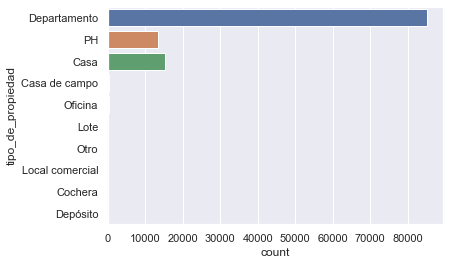

<Figure size 720x432 with 0 Axes>

In [19]:
#sns.catplot(data = data, x = "species", y = "petal_length", kind = 'bar') #ayuda de código
sns.countplot(data = data, y = "tipo_de_propiedad")
plt.figure(figsize=(10,6))

In [20]:
#Respondienso a la pregunta de cuantas instancias tiene cada uno de los tipos de propiedad
data.tipo_de_propiedad.value_counts()
#data.tipo_de_propiedad.count('Departamento') #No da con esto

Departamento       85071
Casa               15162
PH                 13530
Oficina              336
Casa de campo        240
Otro                  98
Lote                  29
Local comercial       15
Depósito               5
Cochera                2
Name: tipo_de_propiedad, dtype: int64

**Nota**: Según este gráfico los tipos de propiedades más representativos que hay en el dataset son: Departamento, Casa, PH (Propiedad horizontal),en orden Descendente respectivamente; siendo los departamentos mucho más protagonista en los anuncios de ventas.

In [21]:
data.tipo_de_propiedad

0         Departamento
1                   PH
2                   PH
3                   PH
4                   PH
              ...     
146655    Departamento
146656    Departamento
146657    Departamento
146658    Departamento
146659    Departamento
Name: tipo_de_propiedad, Length: 114488, dtype: object

In [22]:
data.tipo_de_propiedad.count()

114488

In [23]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
#sns.pairplot(data, hue = 'property_type')
#sns.swarmplot(x = "day", y = "total_bill", data = tips);



4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

**Nota**: l2 corresponde a provincia y l3 a ciudad

<AxesSubplot:xlabel='provincia', ylabel='count'>

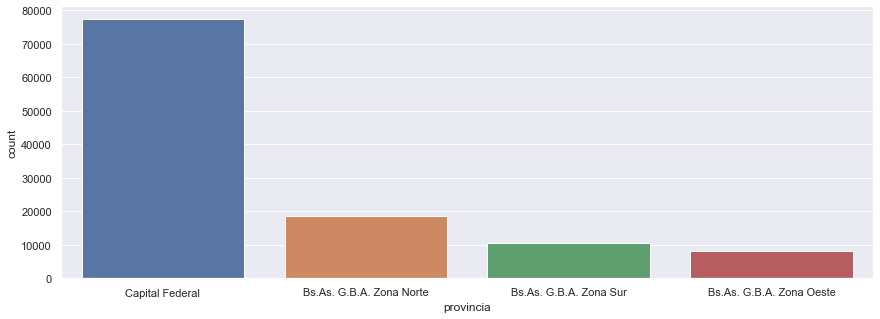

In [24]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
#'l2':'provincia','l3':'ciudad','property_type':'tipo_de_propiedad'
#PRIMER INTENTO
plt.figure(figsize = (8*4,5))
plt.subplot(1,2,1)
#sns.countplot(data = data, x = "provincia", order=data['provincia'].value_counts().index, hue = 'tipo_de_propiedad')
sns.countplot(data = data, x = "provincia", order=data['provincia'].value_counts().index)
#sns.catplot(data = data, x = "provincia", y = "tipo_de_propiedad", kind = 'bar') No dío
#sns.barplot(data = data, x = "species", y = "petal_length",ci = "sd",estimator=np.median)#ayuda de código


#plt.hist(muestras, , alpha = 0.75, edgecolor='black', linewidth=1.2)
#plt.tight_layout()
#plt.show()

#SEGUNDA FORMA ¿Son dos gráficos distintos? solo es publicar las regiones sin relacionarlos al tipo de propiedad?
#Quiero hacer un grafico llamado stacked bar chart de matplotlib, en el eje x las regiones en el y el tipo de propiedad

#fig, ax = plt.subplots()

#ax.bar(labels, men_means, width, yerr=men_std, label='Men')
#ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
 #      label='Women')

#ax.set_ylabel('Scores')
#ax.set_title('Scores by group and gender')
#ax.legend()

#plt.show()

In [25]:
data['provincia'].value_counts()

Capital Federal             77338
Bs.As. G.B.A. Zona Norte    18582
Bs.As. G.B.A. Zona Sur      10477
Bs.As. G.B.A. Zona Oeste     8091
Name: provincia, dtype: int64

**Nota:** como se puede visualizar hay 4 regiones en donde se publican las propiedades a vender. Y se visualiza, que la Capital Federal es donde más publican avisos para vender propiedades. 

C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


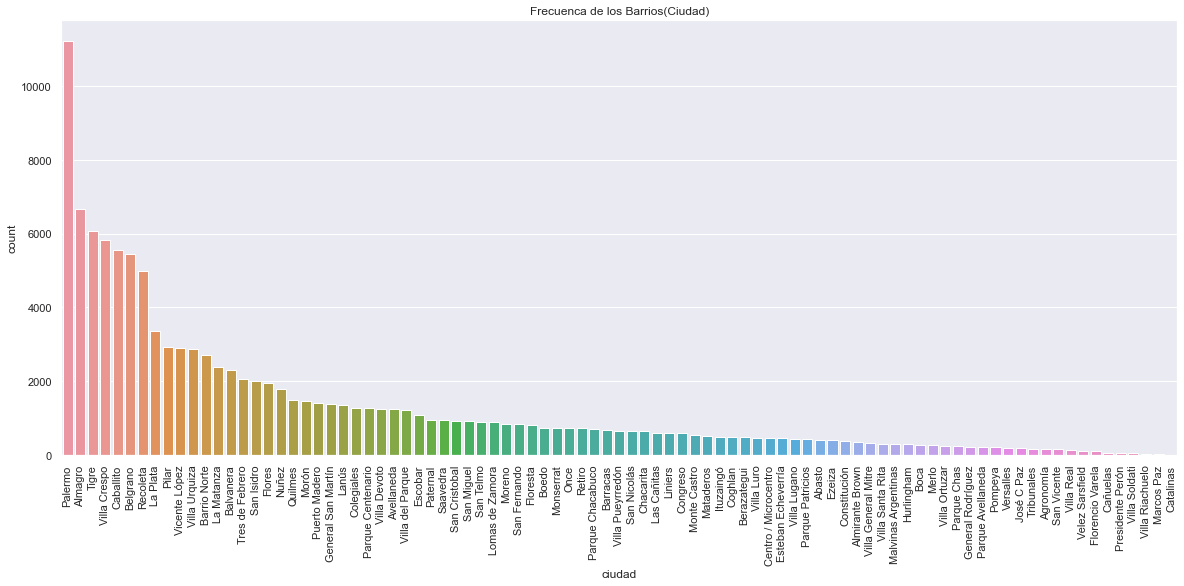

In [26]:
#sns.countplot(data = data, y = "ciudad") Muy apelmasado
#data.tipo_de_propiedad.value_counts()

plt.figure(figsize = (20,8))
sns.countplot(data['ciudad'], order=data['ciudad'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Frecuenca de los Barrios(Ciudad)')
plt.show()
#Necesito modificar este gráfico

#Otra forma
#fig1, ax1 = plt.subplots()
#ax1.pie(data.ciudad.value_counts(), labels=data.ciudad, autopct='%1.1f%%', #Que pongo en size?
        #shadow=True, startangle=90)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.



In [27]:
data['ciudad'].value_counts()

Palermo             11211
Almagro              6655
Tigre                6069
Villa Crespo         5835
Caballito            5562
                    ...  
Presidente Perón       67
Villa Soldati          65
Villa Riachuelo        33
Marcos Paz             21
Catalinas               5
Name: ciudad, Length: 89, dtype: int64

**Nota**: Podemos observar que el barrio más representativo en el dataset es Palermo. El cual tiene más anuncia de venta de propiedades con un total de 11.211; Las ciudades de Almagro, Tigre, Villa Crespo, Caballito y Belgrano son los siguientes en su respectivo orden con más de 5 mil anuncios de venta.   

In [28]:
Localidades=data['ciudad'].value_counts()
Localidades.head(50)

Palermo               11211
Almagro                6655
Tigre                  6069
Villa Crespo           5835
Caballito              5562
Belgrano               5444
Recoleta               4986
La Plata               3372
Pilar                  2923
Vicente López          2895
Villa Urquiza          2885
Barrio Norte           2707
La Matanza             2389
Balvanera              2295
Tres de Febrero        2051
San Isidro             1995
Flores                 1962
Nuñez                  1785
Quilmes                1503
Morón                  1474
Puerto Madero          1411
General San Martín     1376
Lanús                  1368
Colegiales             1283
Parque Centenario      1271
Villa Devoto           1257
Avellaneda             1238
Villa del Parque       1235
Escobar                1092
Paternal                943
Saavedra                940
San Cristobal           917
San Miguel              915
San Telmo               909
Lomas de Zamora         894
Moreno              

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

**Respuesta**

Del punto 3, las tres clases màs abundates de tipos de propiedades son: **Departamento, PH y Casas**.

Del punto 4, la región con más propiedades publicadas es **La Capital Federal** 

In [29]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
# Filtrado explicado:
#Se realiza el filtrado utilizando una mascara para las propiedades ubicadas en Capital Federal
mascara = data['provincia'].values == 'Capital Federal'

#Se crea un nuevo dataset seleccionando las filas con el método Loc()
new_data = data.loc[mascara] 

# Se crea una lista con las categóticas de tipos de propiedad que interesa seleccionar
tofp =['Departamento','Casa','PH'] 


Filtro = new_data[new_data.tipo_de_propiedad.isin(tofp)]
Filtro.shape



#n1 = data[data.provincia == 'Capital Federal']
#n1 = data.filter('provincia' == 'Capital Federal', axis = 0)
#data[data.provincia.isin(['Capital Federal']) & data.tipo_de_propiedad.isin(['Departamento','Casa','PH'])]
#n2 = n1[n1.tipo_de_propiedad.isin(['Departamento','Casa','PH'])]
#n1.head()
#¿cómo compruebo que esto si filtro bien a parte del shape? porque cuando gráfico las barras de provincia me aparecen
#todas
#n = data['provincia'] == 'Capital Federal' 
#n.head()

(76961, 19)

**¿Porqué no me da el mismo dato en las instancias? en el Checkpoint**

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

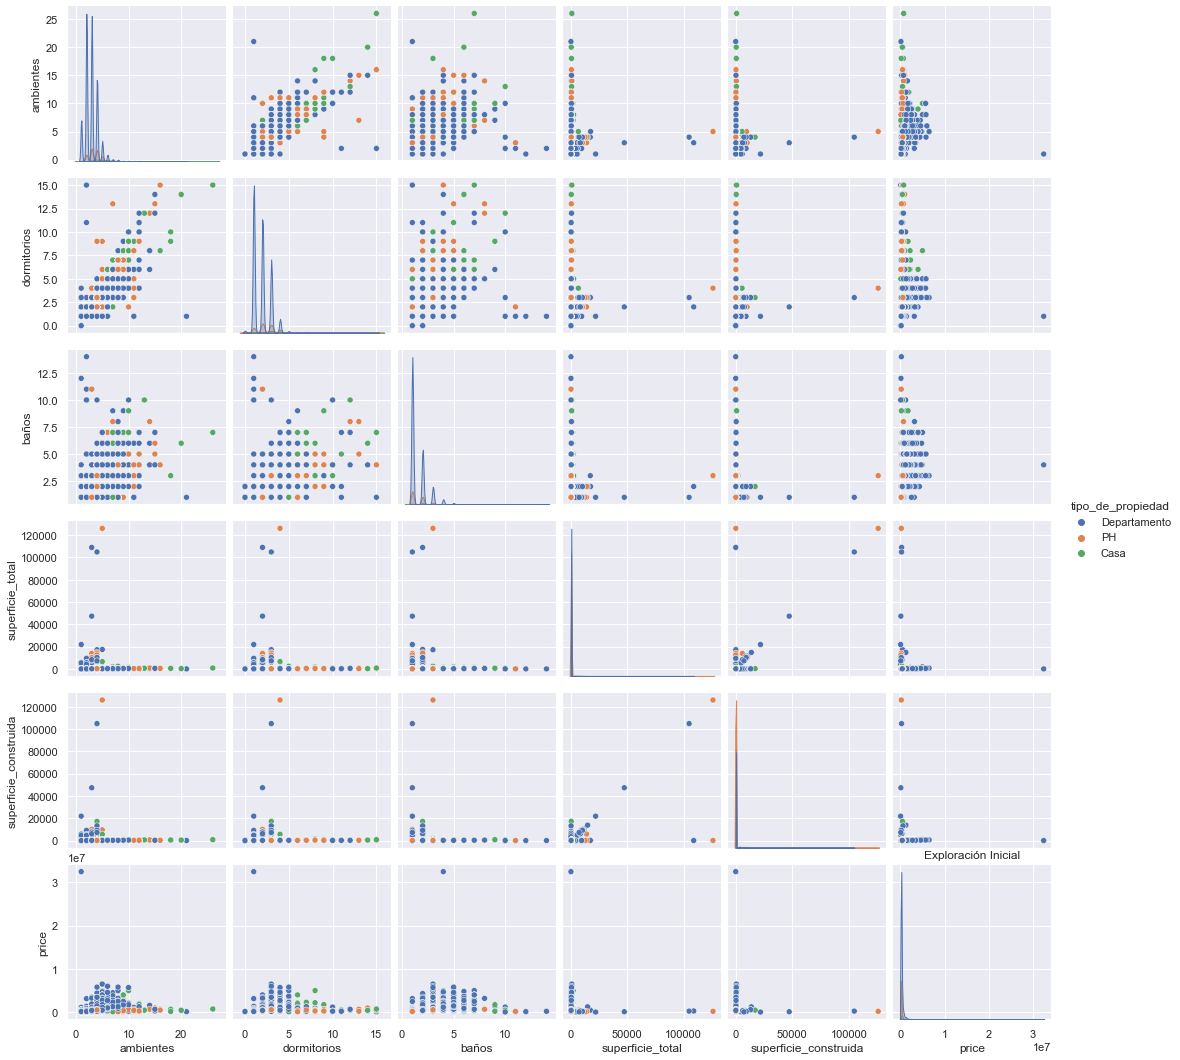

In [30]:
#'star_date':'fecha_alta','end_date':'fecha_Baja',
#                    'created_on':'fecha_Alta1V', 'lat':'latitud','lon':'longitud', 'l1':'país','l2':'provincia','l3':'ciudad',
#                            'rooms':'ambientes', 'bedrooms': 'dormitorios','bathrooms':'baños', 
#                            'surface_total':'superficie_total','surface_covered':'superficie_construida',
#                            'property_type':'tipo_de_propiedad','operation_type':'tipo_operación'})

# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
#Exploración inicial 
# cuando pongo data en Filtro me aparece esto: UserWarning: Dataset has 0 variance; skipping density estimate. warnings.warn(msg, UserWarning)
sns.pairplot(Filtro, hue = 'tipo_de_propiedad', vars= ['ambientes', 'dormitorios', 'baños', 'superficie_total', 'superficie_construida', 
                                                     'price'])
plt.title('Exploración Inicial')
plt.show()

In [31]:
#datos estadísticos
data.describe()

,latitud,longitud,ambientes,dormitorios,baños,superficie_total,superficie_construida,price
count,114488.000000,114488.000000,114488.000000,114488.000000,114488.000000,114488.000000,114488.000000,1.144880e+05
mean,-34.598315,-58.462856,3.130538,2.067413,1.571527,190.794642,111.777697,2.384234e+05
std,0.095430,0.140075,1.399169,1.088154,0.863424,1485.207096,904.398576,2.947070e+05
min,-35.150806,-59.042416,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.620238,-58.499527,2.000000,1.000000,1.000000,52.000000,46.000000,1.150000e+05
50%,-34.598219,-58.443019,3.000000,2.000000,1.000000,78.000000,67.000000,1.680000e+05
75%,-34.571633,-58.410219,4.000000,3.000000,2.000000,137.000000,107.000000,2.640000e+05
max,-34.159732,-57.805832,35.000000,15.000000,14.000000,169000.000000,126062.000000,3.243423e+07


<AxesSubplot:xlabel='superficie_total'>

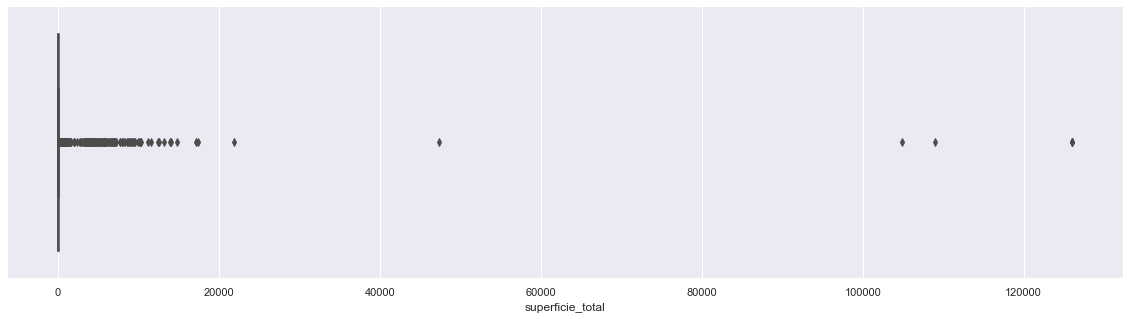

In [32]:
#Encontrando valores atípicos de la superficie total
plt.figure(figsize=(20,5))
sns.boxplot(data = Filtro, x = "superficie_total")

In [33]:
# 25th percentile and 75th percentile
q1 = Filtro['superficie_total'].quantile(q= 0.25)
q3 = Filtro['superficie_total'].quantile(q= 0.75)
# Interquartile Range
iqr = q3 - q1
# Left and Right Bounds (Min/Max)
left_bound_min = q1 - 1.5*iqr
right_bound_max = q3 + 1.5*iqr
# Printing Results
print('Minimum:', left_bound_min)
print('Maximum:', right_bound_max)
print('Q1:', q1)
print('Q3:', q3)

Minimum: -42.5
Maximum: 201.5
Q1: 49.0
Q3: 110.0


**Haciendo punto B y punto C**

count    76800.000000
mean        94.770143
std         77.174822
min         15.000000
25%         49.000000
50%         70.000000
75%        110.000000
max        995.000000
Name: superficie_total, dtype: float64

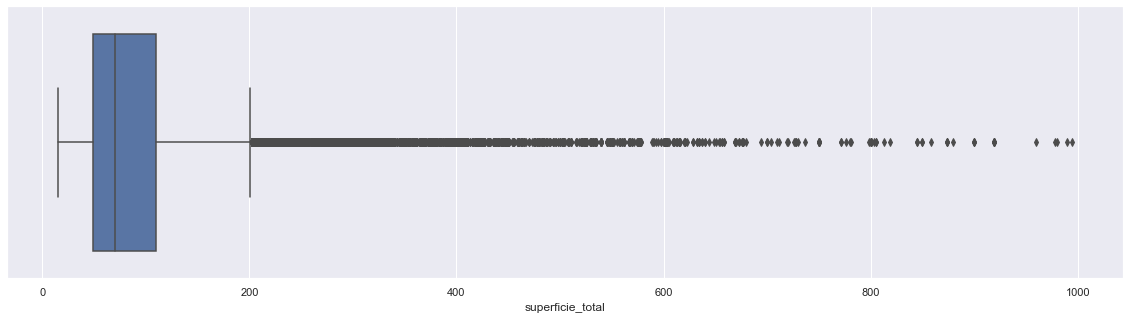

In [34]:
# Según el máximo no atípico, quitaré los datos por encima de 600 mt2 y viendo el texto abajo voy a quitar las propiedades que están por 
#debajo de 14 mt2
#Lo cambie a 1000 mts2 por la información de abajo

FiltroA= Filtro.loc[(Filtro['superficie_total'] < 1000) & (Filtro['superficie_total'] >14)]

#gráficamos
plt.figure(figsize=(20,5))
sns.boxplot(data = FiltroA, x = "superficie_total")
FiltroA.superficie_total.describe()

In [35]:
FiltroA.head()

,start_date,fecha_Baja,fecha_Alta1V,latitud,longitud,país,provincia,ciudad,ambientes,dormitorios,baños,superficie_total,superficie_construida,price,currency,title,description,tipo_de_propiedad,tipo_operación
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


In [36]:
FiltroA.shape

(76800, 19)

**Haciendo punto D**

In [37]:

FiltroA['Superficie_Positiva'] = FiltroA['superficie_total'] - FiltroA['superficie_construida']
FiltroA.head()

<ipython-input-37-775efc304e52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FiltroA['Superficie_Positiva'] = FiltroA['superficie_total'] - FiltroA['superficie_construida']


,start_date,fecha_Baja,fecha_Alta1V,latitud,longitud,país,provincia,ciudad,ambientes,dormitorios,baños,superficie_total,superficie_construida,price,currency,title,description,tipo_de_propiedad,tipo_operación,Superficie_Positiva
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta,0.0
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,12.0
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,0.0
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta,35.0
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta,0.0


In [38]:

FiltroD = FiltroA[FiltroA["Superficie_Positiva"] >= 0]
FiltroD.head()

,start_date,fecha_Baja,fecha_Alta1V,latitud,longitud,país,provincia,ciudad,ambientes,dormitorios,baños,superficie_total,superficie_construida,price,currency,title,description,tipo_de_propiedad,tipo_operación,Superficie_Positiva
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta,0.0
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,12.0
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,0.0
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta,35.0
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta,0.0


In [39]:
FiltroD.shape

(76062, 20)

**Resolviendo el punto E**

<AxesSubplot:xlabel='price'>

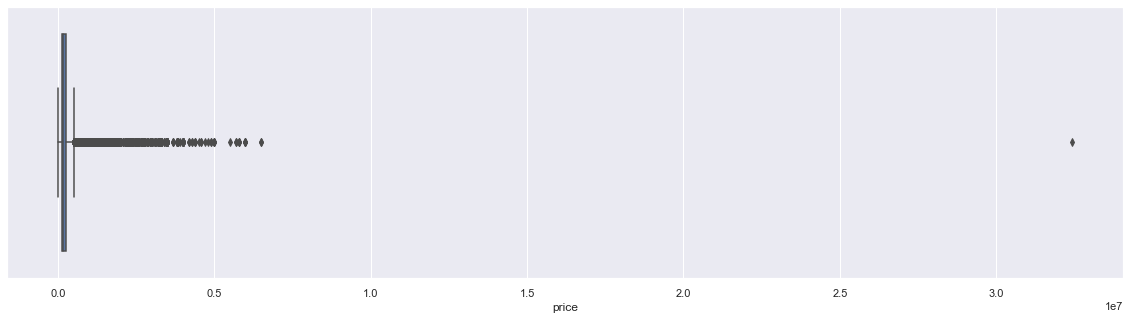

In [40]:
#Encontrando valores atípicos en la columna precio
plt.figure(figsize=(20,5))
sns.boxplot(data = Filtro, x = "price")

In [41]:
# 25th percentile and 75th percentile
q1 = FiltroD['price'].quantile(q= 0.25)
q3 = FiltroD['price'].quantile(q= 0.75)
# Interquartile Range
iqr = q3 - q1
# Left and Right Bounds (Min/Max)
left_bound_min = q1 - 1.5*iqr
right_bound_max = q3 + 1.5*iqr
# Printing Results
print('Minimum:', left_bound_min)
print('Maximum:', right_bound_max)
print('Q1:', q1)
print('Q3:', q3)

Minimum: -104500.0
Maximum: 507500.0
Q1: 125000.0
Q3: 278000.0


count     72477.000000
mean     207945.818825
std      122294.146984
min       33411.000000
25%      120000.000000
50%      170000.000000
75%      259000.000000
max      699999.000000
Name: price, dtype: float64

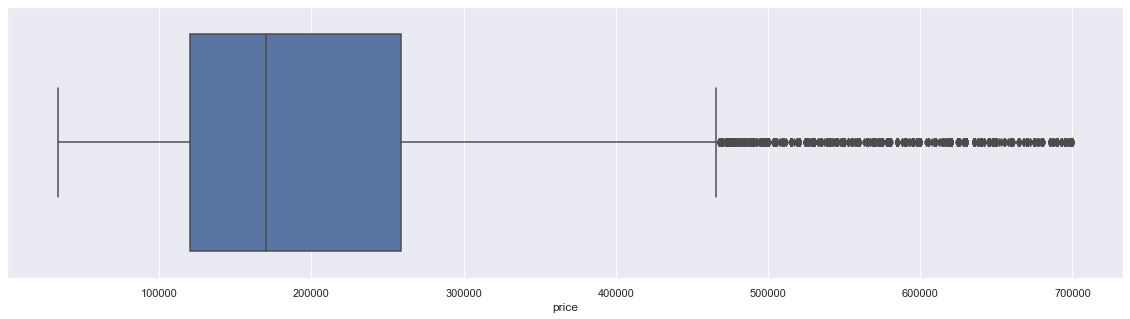

In [42]:
#Filtrando los precios del dataset. Se escogieron 700 mil para superar un poco el máximo teorico del paso anterior y 33 mil
# por sugerencia de un compañero que vive en el sector.

FiltroE = FiltroD.loc[(FiltroD['price'] < 700000) & (Filtro['price'] >33000)]

#gráficamos
plt.figure(figsize=(20,5))
sns.boxplot(data = FiltroE, x = "price")
FiltroE.price.describe()

**Finalizando con el punto F**

In [43]:
FiltroE.describe()

,latitud,longitud,ambientes,dormitorios,baños,superficie_total,superficie_construida,price,Superficie_Positiva
count,72477.000000,72477.000000,72477.000000,72477.000000,72477.000000,72477.000000,72477.000000,72477.000000,72477.000000
mean,-34.598793,-58.436098,2.909985,1.933634,1.453013,86.053369,73.718973,207945.818825,12.334396
std,0.023349,0.035124,1.200640,1.004040,0.718405,61.605050,46.190996,122294.146984,27.288944
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,15.000000,1.000000,33411.000000,0.000000
25%,-34.612515,-58.458590,2.000000,1.000000,1.000000,48.000000,44.000000,120000.000000,0.000000
50%,-34.599181,-58.433710,3.000000,2.000000,1.000000,69.000000,60.000000,170000.000000,5.000000
75%,-34.585320,-58.411855,4.000000,3.000000,2.000000,101.000000,89.000000,259000.000000,10.000000
max,-34.535909,-58.353930,21.000000,15.000000,14.000000,995.000000,891.000000,699999.000000,853.000000


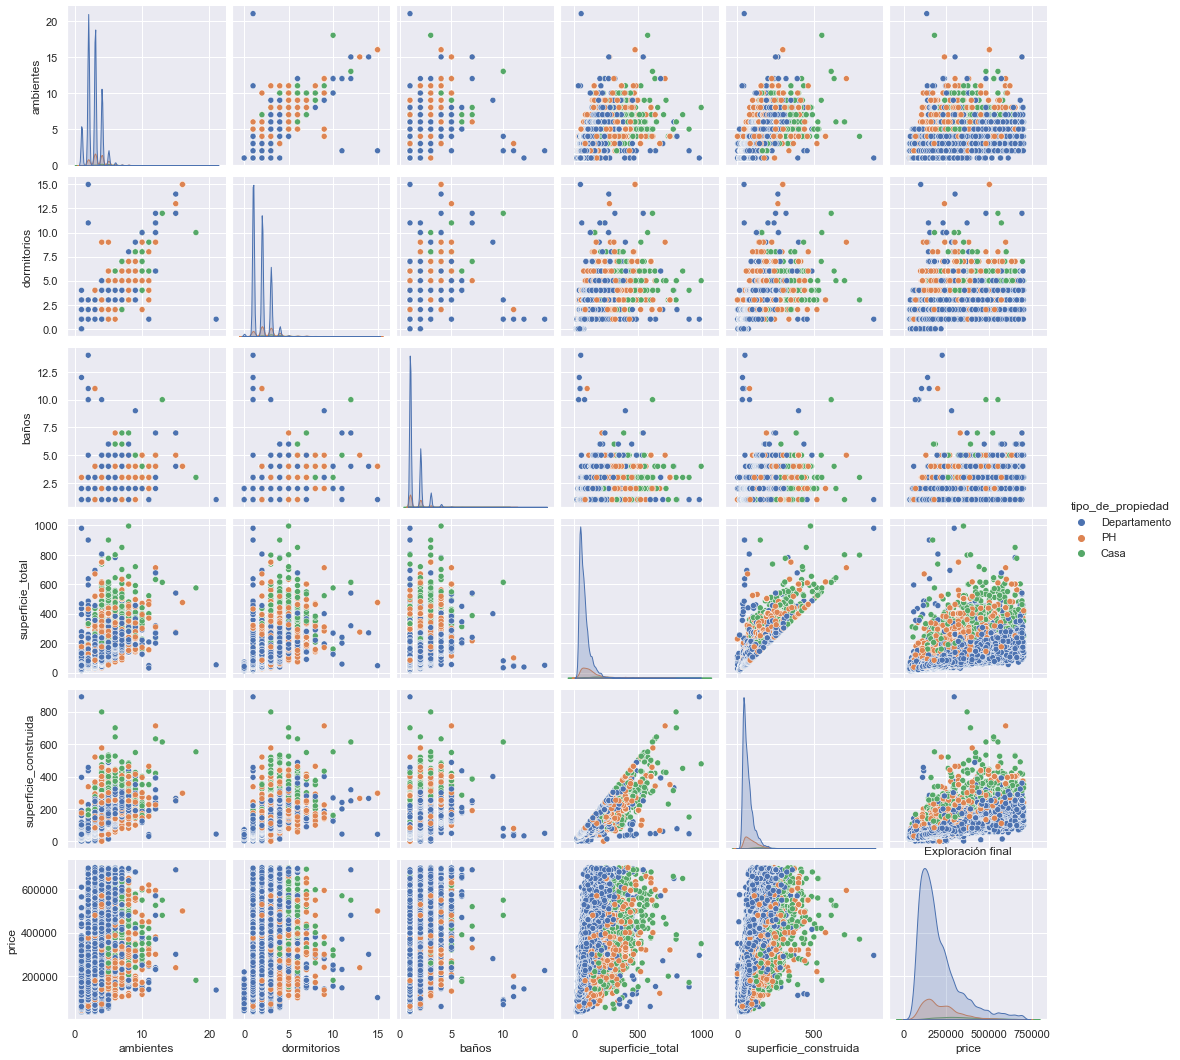

In [44]:
sns.pairplot(FiltroE, hue = 'tipo_de_propiedad', vars= ['ambientes', 'dormitorios', 'baños', 'superficie_total', 'superficie_construida', 
                                                     'price'])


plt.title('Exploración final')
plt.show()

**Comentario**

(...)

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [45]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO

FiltroE.corr()


,latitud,longitud,ambientes,dormitorios,baños,superficie_total,superficie_construida,price,Superficie_Positiva
latitud,1.000000,-0.100912,-0.065823,-0.072884,0.056148,-0.067961,-0.048463,0.239228,-0.071390
longitud,-0.100912,1.000000,0.036511,0.033299,0.031441,-0.028031,0.034393,0.103855,-0.121497
ambientes,-0.065823,0.036511,1.000000,0.934530,0.575752,0.712338,0.772689,0.591316,0.300207
dormitorios,-0.072884,0.033299,0.934530,1.000000,0.581991,0.695438,0.756555,0.569582,0.289364
baños,0.056148,0.031441,0.575752,0.581991,1.000000,0.573435,0.633730,0.651316,0.221842
superficie_total,-0.067961,-0.028031,0.712338,0.695438,0.573435,1.000000,0.910899,0.663275,0.715665
superficie_construida,-0.048463,0.034393,0.772689,0.756555,0.633730,0.910899,1.000000,0.723805,0.363699
price,0.239228,0.103855,0.591316,0.569582,0.651316,0.663275,0.723805,1.000000,0.272190
Superficie_Positiva,-0.071390,-0.121497,0.300207,0.289364,0.221842,0.715665,0.363699,0.272190,1.000000


In [46]:
print(FiltroE.columns) #Titulos de las columnas

Index(['start_date', 'fecha_Baja', 'fecha_Alta1V', 'latitud', 'longitud',
       'país', 'provincia', 'ciudad', 'ambientes', 'dormitorios', 'baños',
       'superficie_total', 'superficie_construida', 'price', 'currency',
       'title', 'description', 'tipo_de_propiedad', 'tipo_operación',
       'Superficie_Positiva'],
      dtype='object')


In [47]:
#Quitando columnas

Filtro7 = FiltroE.drop(['start_date', 'fecha_Baja','fecha_Alta1V', 'latitud', 'longitud','país', 'provincia', 'ciudad',
                                            'currency','title', 'description', 'tipo_operación','Superficie_Positiva'], axis = 1)

Filtro7.head()

,ambientes,dormitorios,baños,superficie_total,superficie_construida,price,tipo_de_propiedad
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH


In [48]:
Filtro7.corr()

,ambientes,dormitorios,baños,superficie_total,superficie_construida,price
ambientes,1.000000,0.934530,0.575752,0.712338,0.772689,0.591316
dormitorios,0.934530,1.000000,0.581991,0.695438,0.756555,0.569582
baños,0.575752,0.581991,1.000000,0.573435,0.633730,0.651316
superficie_total,0.712338,0.695438,0.573435,1.000000,0.910899,0.663275
superficie_construida,0.772689,0.756555,0.633730,0.910899,1.000000,0.723805
price,0.591316,0.569582,0.651316,0.663275,0.723805,1.000000


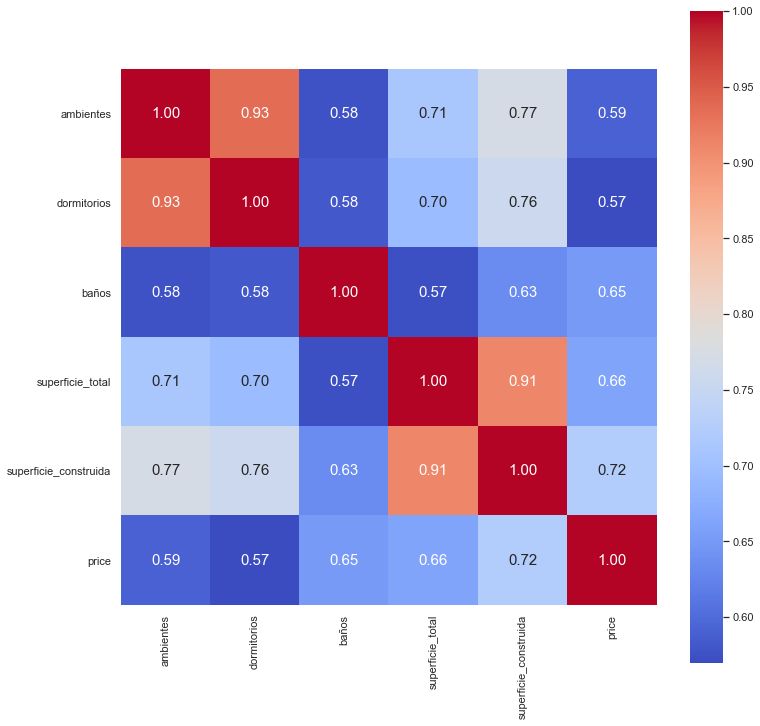

In [49]:
#Corregido
corr = Filtro7.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
            xticklabels= Filtro7.drop(columns = 'tipo_de_propiedad').columns, 
            yticklabels= Filtro7.drop(columns = 'tipo_de_propiedad').columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

**Interpretación de la correlación**

Según el gráfico, la superficie construida tiene un 72% de correlación positiva con el precio, lo que puede ayudar a predecir esta última variable. Seguido de la superficie total (66%), baños (65%), ambientes (59%) y por último los dormitorios con un 57%. Me preocupa que no llegue la correlación al 80 o 90 porciento.

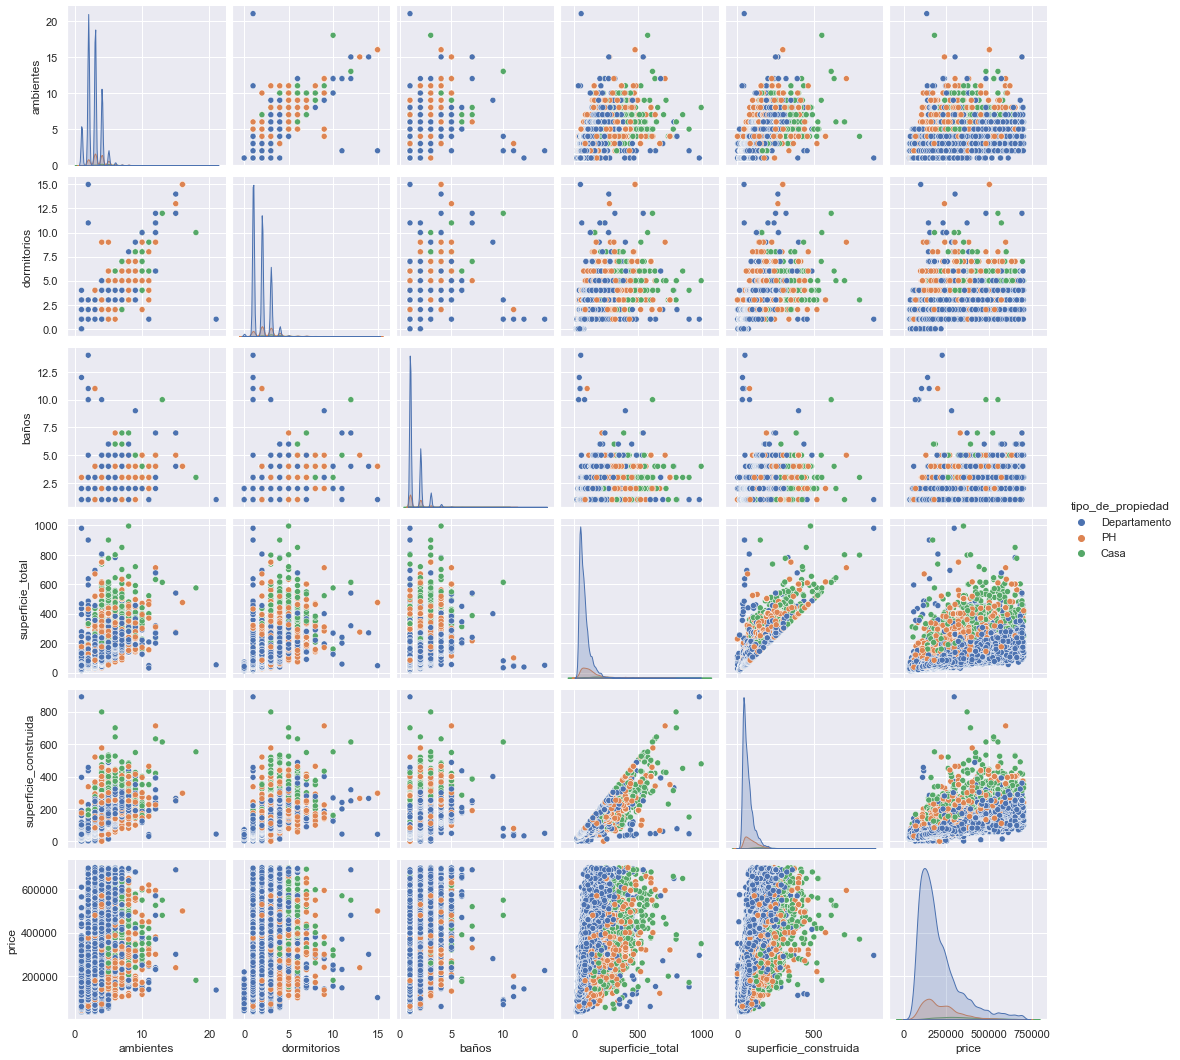

In [50]:
sns.pairplot(Filtro7, hue = 'tipo_de_propiedad', vars= ['ambientes', 'dormitorios', 'baños', 'superficie_total', 'superficie_construida', 
                                                     'price'])


#plt.title('Exploración final')
plt.show()

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


**Proceso**
Para encontrar el barrio mas caro de Buenos aires, primero hay que promediar los precios de cada publicación en los barrios. ¿cómo lo promedio? ¿cómo gráficarlo?

¿qué tipo de propiedad se publica en cada barrio?

Relación metros cuadrados precio?

In [51]:

FiltroE.describe()

,latitud,longitud,ambientes,dormitorios,baños,superficie_total,superficie_construida,price,Superficie_Positiva
count,72477.000000,72477.000000,72477.000000,72477.000000,72477.000000,72477.000000,72477.000000,72477.000000,72477.000000
mean,-34.598793,-58.436098,2.909985,1.933634,1.453013,86.053369,73.718973,207945.818825,12.334396
std,0.023349,0.035124,1.200640,1.004040,0.718405,61.605050,46.190996,122294.146984,27.288944
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,15.000000,1.000000,33411.000000,0.000000
25%,-34.612515,-58.458590,2.000000,1.000000,1.000000,48.000000,44.000000,120000.000000,0.000000
50%,-34.599181,-58.433710,3.000000,2.000000,1.000000,69.000000,60.000000,170000.000000,5.000000
75%,-34.585320,-58.411855,4.000000,3.000000,2.000000,101.000000,89.000000,259000.000000,10.000000
max,-34.535909,-58.353930,21.000000,15.000000,14.000000,995.000000,891.000000,699999.000000,853.000000


In [52]:
FiltroE.info('tipo_de_propiedad')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72477 entries, 0 to 146557
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   start_date             72477 non-null  object 
 1   fecha_Baja             72477 non-null  object 
 2   fecha_Alta1V           72477 non-null  object 
 3   latitud                72477 non-null  float64
 4   longitud               72477 non-null  float64
 5   país                   72477 non-null  object 
 6   provincia              72477 non-null  object 
 7   ciudad                 72477 non-null  object 
 8   ambientes              72477 non-null  float64
 9   dormitorios            72477 non-null  float64
 10  baños                  72477 non-null  float64
 11  superficie_total       72477 non-null  float64
 12  superficie_construida  72477 non-null  float64
 13  price                  72477 non-null  float64
 14  currency               72477 non-null  object 
 15  t

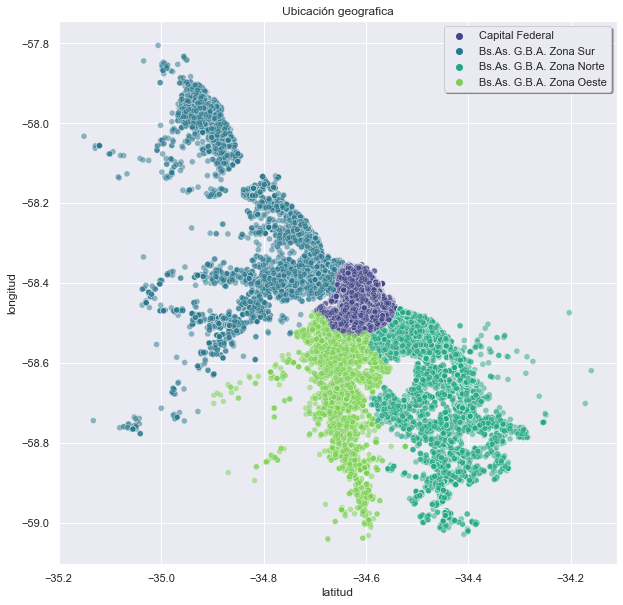

In [53]:
plt.figure(figsize =(10,10))
sns.scatterplot(data = data, x = 'latitud', y = 'longitud', hue = 'provincia', alpha = 0.5, palette = 'viridis')
plt.legend(shadow = True)
plt.title('Ubicación geografica')
plt.show()

En el gráfico anterior, se verifica las zonas donde se publican las propiedades, diferenciando por provincia.

In [54]:

# Se crea una lista con las categóticas de tipos de propiedad que interesa seleccionar
tofp =['Departamento','Casa','PH'] 


data_exp = data[data.tipo_de_propiedad.isin(tofp)]
data_exp.shape


(113763, 19)

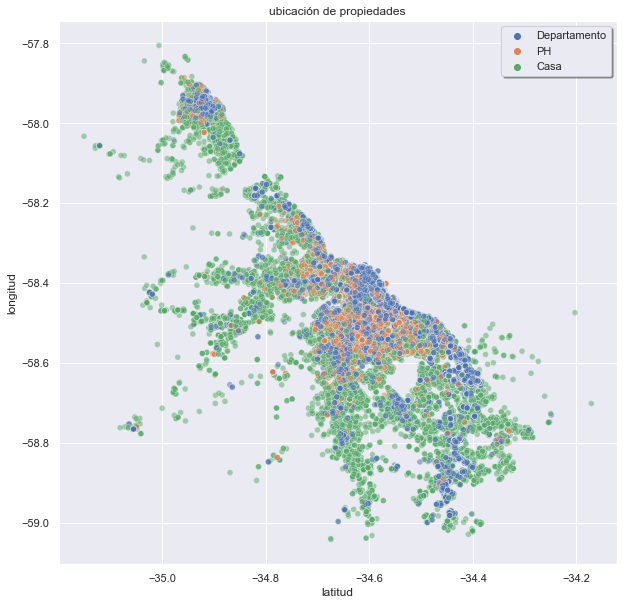

In [55]:
plt.figure(figsize =(10,10))
sns.scatterplot(data = data_exp, x = 'latitud', y = 'longitud', hue = 'tipo_de_propiedad', alpha = 0.5)#palette = 'viridis')
plt.legend(shadow = True)
plt.title('ubicación de propiedades')
plt.show()

En el gráfico anterior se puede visualizar que hay una prediminancia de departamentos en la capital federal y sus alrededores. Aunque se extiende en todas las zonas del GBA, se nota una concentración en Capital Federal. Algo parecido pasa con las PH, aunque visulamente no se nota tanto la extención sur y norte de la GBA.
Por otro lado, las casas, se visualizan más evidentemente a las afueras de las Zonas sur, norte y oeste de la GBA. Además, se nota que en la Capital Federal, no se ofertan muchas casas. Esto puede explicarse por el desarrollo urbano que están "sufriendo" todas las capitales de latinoamerica, en las cuales, se tomans las casas para convertirlas en Departamentos o PH.

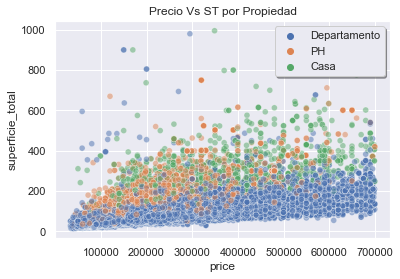

In [56]:
sns.scatterplot(data = Filtro7, x = 'price', y = 'superficie_total', hue = 'tipo_de_propiedad', alpha = 0.5) #, palette = 'viridis')
plt.legend(shadow = True)
plt.title('Precio Vs ST por Propiedad')
plt.show()

En el grafico que antecede, se visualiza una gran variadad de precios para departamentos sin que su superficie total varie drasticamente. Aunque hay una leve inclinación ascendente en el que crece un poco los metros cuadrados y la relación al precio. Podemos sugerir que el valor subjetivo del lugar ubicado, sus alrededores, su tiempo de construcción, su valorización y su valor sentimental puede afectar los precios considerablemente. Tales valores, no están presente en el dataframe; lo que puede ser un punto a mejorar.

<Figure size 720x288 with 0 Axes>

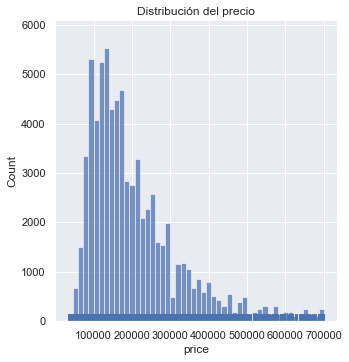

In [57]:
plt.figure(figsize=(10,4))
sns.displot(Filtro7['price'], bins = 50, rug = True)
plt.title('Distribución del precio')
plt.show()

In [58]:
Filtro7.price.describe()

count     72477.000000
mean     207945.818825
std      122294.146984
min       33411.000000
25%      120000.000000
50%      170000.000000
75%      259000.000000
max      699999.000000
Name: price, dtype: float64

La distribución de los precios, se asemeja a una distribución normal. Apesar de que se hizo un ejercicio de eliminación de Valores Atípicos, todavía existen precios que se alejan bastante del promedio. Lo cual, puede ser una dificultad a la hora de buscar el mejor modelo predictivo.

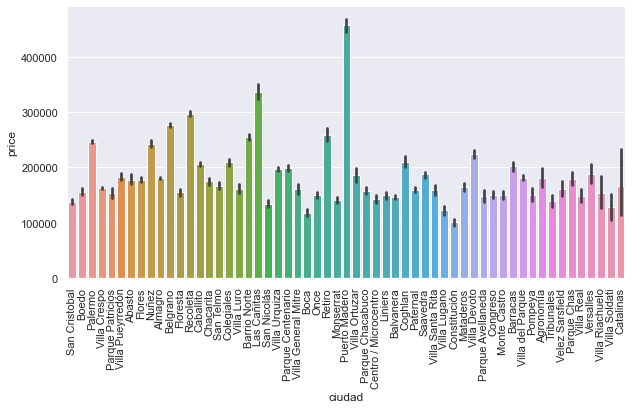

In [59]:
plt.figure(figsize =(10,5))
sns.barplot(data = FiltroE, x = FiltroE.ciudad, y= FiltroE['price'])#palette = "viridis"
plt.xticks(rotation=90)
plt.show()

Puerto Madero, Las Cañitas, Recoleta; de mayor a menor, son los barrios que más precios tienen en propiedades. 

In [60]:
data.provincia

0                  Capital Federal
1                  Capital Federal
2                  Capital Federal
3                  Capital Federal
4           Bs.As. G.B.A. Zona Sur
                    ...           
146655      Bs.As. G.B.A. Zona Sur
146656    Bs.As. G.B.A. Zona Norte
146657    Bs.As. G.B.A. Zona Norte
146658    Bs.As. G.B.A. Zona Norte
146659    Bs.As. G.B.A. Zona Norte
Name: provincia, Length: 114488, dtype: object

In [61]:
data['provincia'].value_counts()

Capital Federal             77338
Bs.As. G.B.A. Zona Norte    18582
Bs.As. G.B.A. Zona Sur      10477
Bs.As. G.B.A. Zona Oeste     8091
Name: provincia, dtype: int64

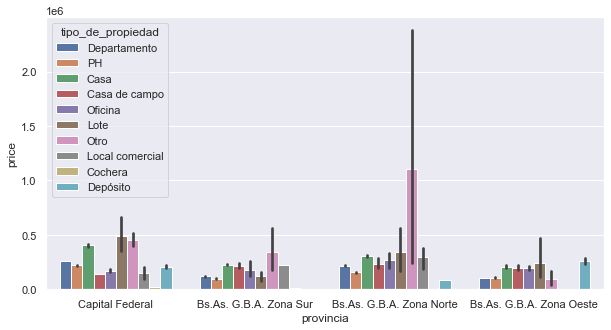

In [62]:
#Distribución de tipo de propiedad por las provincias, se notan los datos atípicos.
plt.figure(figsize =(10,5))
sns.barplot(data = data, x = data['provincia'], y= data.price, hue = 'tipo_de_propiedad')#, order = FiltroE.price ) #palette = "viridis"
#plt.xticks(rotation=90)
plt.show()

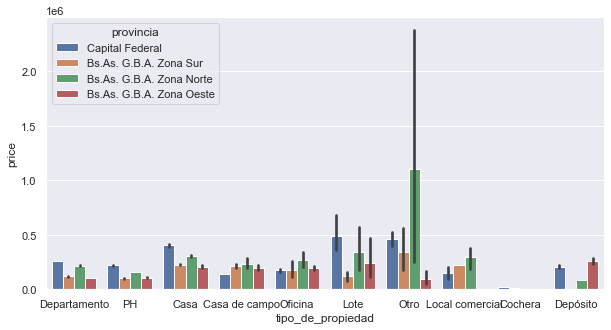

In [63]:
plt.figure(figsize =(10,5))
sns.barplot(data = data, x = data['tipo_de_propiedad'], y= data.price, hue = 'provincia')#, order = FiltroE.price ) #palette = "viridis"
#plt.xticks(rotation=90)
plt.show()

Hay un valor atípico en la zona norte y tipo de propiedad otro

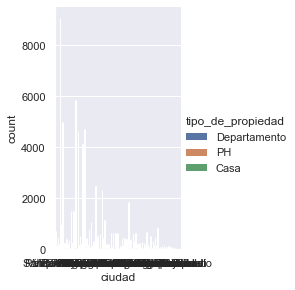

In [64]:
#Graficando el barrio más caro
import seaborn as sns
sns.set_theme(style="darkgrid")
#ax = sns.countplot(y="price", hue="tipo_de_propiedad", data=FiltroE)
g = sns.catplot(x="ciudad", hue="tipo_de_propiedad", #col="provincia",
                data=FiltroE, kind="count",
                height=4, aspect=.7);
#titanic = sns.load_dataset("titanic")
#ax = sns.countplot(x="class", data=titanic)


### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [6]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO

#cargando datos
data_ml = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
data_ml.head(5) #Mostrando primeras 5 instancias




,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [7]:
#Renombrando las columnas
data_ml = data_ml.rename(columns={ 'star_date':'fecha_alta','end_date':'fecha_Baja',
                            'created_on':'fecha_Alta1V', 'lat':'latitud','lon':'longitud', 'l1':'país','l2':'provincia','l3':'ciudad',
                            'rooms':'ambientes', 'bedrooms': 'dormitorios','bathrooms':'baños', 
                            'surface_total':'superficie_total','surface_covered':'superficie_construida',
                            'property_type':'tipo_de_propiedad','operation_type':'tipo_operación'})

**Punto 3 Sección 1**

In [8]:
#Filtrado estandarizado para el data set y para el punto 3

#Se realiza el filtrado utilizando una mascara para las propiedades ubicadas en Capital Federal
mascara = data_ml['provincia'].values == 'Capital Federal'

#Se crea un nuevo dataset seleccionando las filas con el método Loc()
new_data_ml = data_ml.loc[mascara] 

# Se crea una lista con las categóticas de tipos de propiedad que interesa seleccionar
tofp =['Departamento','Casa','PH'] 


dml = new_data_ml[new_data_ml.tipo_de_propiedad.isin(tofp)]
dml.shape


(91485, 19)

In [9]:
dml.head()

,start_date,fecha_Baja,fecha_Alta1V,latitud,longitud,país,provincia,ciudad,ambientes,dormitorios,baños,superficie_total,superficie_construida,price,currency,title,description,tipo_de_propiedad,tipo_operación
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


**Punto 3 Sección 2**

count    82405.000000
mean        95.395874
std         77.742412
min         15.000000
25%         49.000000
50%         71.000000
75%        110.000000
max       1000.000000
Name: superficie_total, dtype: float64

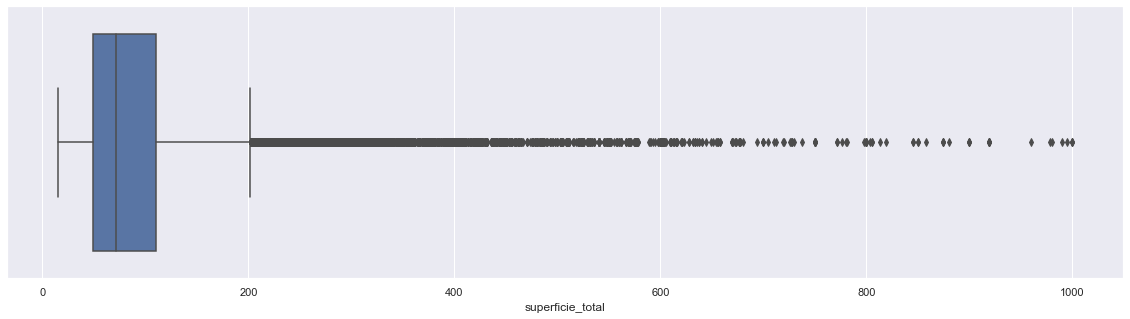

In [10]:
#Acotando el dataset con la columna de superficie total.

dmlA= dml.loc[(dml['superficie_total'] <= 1000) & (dml['superficie_total'] >=15)]

#gráficamos
plt.figure(figsize=(20,5))
sns.boxplot(data = dmlA, x = "superficie_total")
dmlA.superficie_total.describe()

In [11]:
dmlA.shape

(82405, 19)

**Punto 3 Sección 3**

In [12]:
#Filtrando los precios del dataset con el precio

dmlB = dmlA.loc[(dmlA['price'] <= 4000000)]

plt.figure(figsize=(20,5))
#sns.boxplot(data = dmlB, x = "price")
dmlB.price.describe()
dmlB.shape

(82373, 19)

<Figure size 1440x360 with 0 Axes>

In [13]:
dmlB.price.describe()

count    8.237300e+04
mean     2.628461e+05
std      2.976546e+05
min      6.000000e+03
25%      1.250000e+05
50%      1.799000e+05
75%      2.800000e+05
max      4.000000e+06
Name: price, dtype: float64

**Punto 3 Sección 4**

In [14]:
#Quitando columnas

dmlC = dmlB.drop(['start_date', 'fecha_Baja','fecha_Alta1V', 'latitud', 'longitud','país', 'provincia', 'ciudad',
                                            'currency','title', 'description', 'tipo_operación','tipo_de_propiedad'], axis = 1)


dmlC.head()

,ambientes,dormitorios,baños,superficie_total,superficie_construida,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


In [15]:
dmlC.shape

(82373, 6)

**Punto 3 Sección 5**

In [16]:
dmlC.sample()

,ambientes,dormitorios,baños,superficie_total,superficie_construida,price
118532,3.0,2.0,1.0,83.0,60.0,145000.0


In [17]:
valores_faltantes = dmlC.isnull().sum()

In [18]:
valores_faltantes[0:6]

ambientes                  0
dormitorios                0
baños                    880
superficie_total           0
superficie_construida    517
price                      0
dtype: int64

In [19]:
valores_faltantes[0:19]
print(valores_faltantes)

ambientes                  0
dormitorios                0
baños                    880
superficie_total           0
superficie_construida    517
price                      0
dtype: int64


In [20]:
#dmlC = dmlC.dropna() #Eliminando valores nulos

dmlC.dropna(axis=0, inplace=True)

In [21]:
dmlC.isnull().sum()

ambientes                0
dormitorios              0
baños                    0
superficie_total         0
superficie_construida    0
price                    0
dtype: int64

In [22]:
dmlC.shape

(81019, 6)

**

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?


In [23]:
dmlC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81019 entries, 0 to 146558
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ambientes              81019 non-null  float64
 1   dormitorios            81019 non-null  float64
 2   baños                  81019 non-null  float64
 3   superficie_total       81019 non-null  float64
 4   superficie_construida  81019 non-null  float64
 5   price                  81019 non-null  float64
dtypes: float64(6)
memory usage: 4.3 MB


In [24]:
X = dmlC.drop("price",axis=1)

In [25]:
y = dmlC.price

Probando los metodos con y como precio para predecir y X como ambientes, dormitorios, baños, superficie total, superficie contruida como variables que ayudaran a predecir.

In [26]:
X.head()

,ambientes,dormitorios,baños,superficie_total,superficie_construida
0,7.0,7.0,2.0,140.0,140.0
1,2.0,1.0,2.0,70.0,58.0
2,2.0,1.0,1.0,45.0,45.0
3,2.0,1.0,1.0,85.0,50.0
5,2.0,1.0,1.0,56.0,56.0


In [27]:
y.head()

0    153000.0
1    159000.0
2    125000.0
3    295000.0
5    150000.0
Name: price, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

linear_model1 = LinearRegression()
tree_regressor1 = DecisionTreeRegressor(max_depth=15)  #(max_depth=62) con 62 de profundidad alcanza el máx Rcuadrado 0.90 
                                                       # si me bajo a 15 de profundidad el R2 baja a 0.87  
knn_regressor1 = KNeighborsRegressor(n_neighbors=3)



In [41]:
linear_model1.fit(X_train, y_train)
tree_regressor1.fit(X_train, y_train)
knn_regressor1.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [42]:
# Predicción datos de testeo

y_test_pred1_LiA = linear_model1.predict(X_test)
y_test_pred1_treeA = tree_regressor1.predict(X_test)
y_test_pred1_knnA = knn_regressor1.predict(X_test)



In [43]:
y_train_pred1_LiB = linear_model1.predict(X_train)
y_train_pred1_treeB = tree_regressor1.predict(X_train)
y_train_pred1_knnB = knn_regressor1.predict(X_train)

In [44]:
print(linear_model1.coef_, linear_model1.intercept_)

[ 1.16192981e+04 -6.29435576e+04  1.32759235e+05  2.05427168e+03
  1.07004571e+02] -56646.24807940406


**Calculo del R en los tres modelos

Regresión Lineal

In [45]:
yhat = linear_model1.predict(X)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print('R Cuadrado:',r_squared, 'R cuadrado ajustado:',adjusted_r_squared)


R Cuadrado: 0.5516961159355616 R cuadrado ajustado: 0.551668447296944


Arbol

In [46]:
yhat = tree_regressor1.predict(X)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print('R Cuadrado:',r_squared, 'R cuadrado ajustado:',adjusted_r_squared)


R Cuadrado: 0.8811277904011141 R cuadrado ajustado: 0.8811204537878793



El mejor R cuadrado da con 62 De profundidad con el árbol de desición, hay un riesgo de sobreajuste del modelo

Knn

In [47]:
yhat = knn_regressor1.predict(X)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print('R Cuadrado:',r_squared, 'R cuadrado ajustado:',adjusted_r_squared)

R Cuadrado: 0.8377196452439869 R cuadrado ajustado: 0.8377096295455955


El mejor resultado del R cuadrado es con vecinos de 1, a medida que aumenta se deteriora la metrica.

El mejor R cuadrado en este ejercicio con todas las variables es el del árbol de decisión. Por lo tanto, mejor modelo para predecir.

**¿cómo más evaluo estos modelos?**

Calculando los Errores cuadraticos medios.

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361587


C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


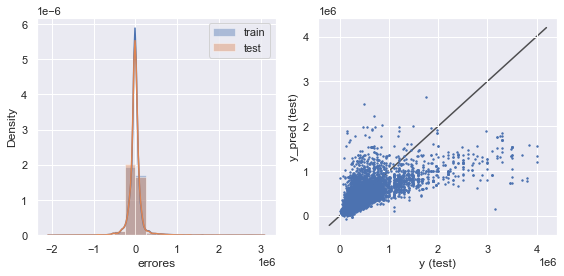

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 52460.90877279167
Raíz del error cuadrático medio en Test: 149683.10501299397


C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


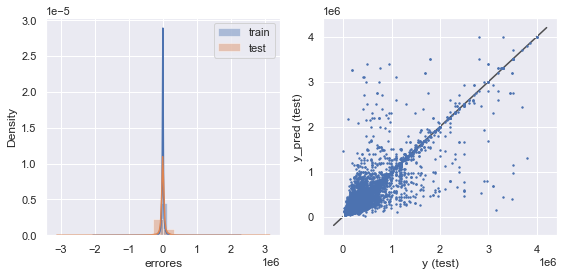

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 77925.75966409931
Raíz del error cuadrático medio en Test: 161757.0594819361


C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


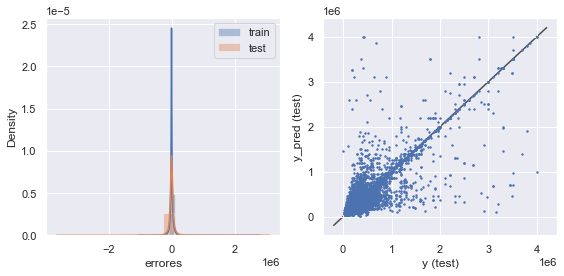

In [96]:
#esta si estará bien hecho?
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model1, tree_regressor1, knn_regressor1]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

El menor error cuadratico medio es el arbol de desiciòn

**Optimicemos los Hiperparametros**

In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix

Para Arboles:

In [405]:
from sklearn.tree import DecisionTreeClassifier
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad
    clf = DecisionTreeClassifier(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

Text(0, 0.5, 'Exactitud')

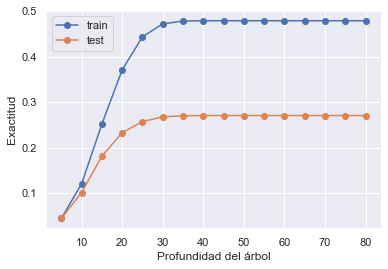

In [406]:
plt.plot(max_depths,lista_accuracy_train,'o-',label='train' )
plt.plot(max_depths,lista_accuracy_test,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('Exactitud')

Con una profundidad de 15 se baja el R cuadrado a 0.87

Mirar las variables màs significativos

**Ahora un modelo de una sola variable**

In [98]:
#Xb = dmlC.superficie_construida
#yb = dmlC.price

#sns.scatterplot(x = dmlC['superficie_construida'], y = dmlC['price'], data = dmlC)

x = dmlC['superficie_total']
y = dmlC.price

<AxesSubplot:xlabel='superficie_total', ylabel='price'>

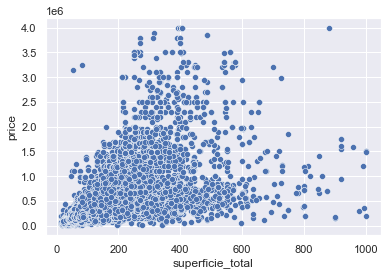

In [99]:
sns.scatterplot(y = dmlC['price'], x = dmlC['superficie_total'], data = dmlC)

In [100]:
x.head()

0    140.0
1     70.0
2     45.0
3     85.0
5     56.0
Name: superficie_total, dtype: float64

In [101]:
y.head()

0    153000.0
1    159000.0
2    125000.0
3    295000.0
5    150000.0
Name: price, dtype: float64

In [102]:
x = np.array(x).reshape(-1,1)

In [103]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [104]:
print(X_train.shape)
print(y_train.shape)

(56713, 1)
(56713,)


In [105]:
#Modelos
n_neighbors = 5
clf_knn = KNeighborsRegressor(n_neighbors =n_neighbors) #(n_neighbors =n_neighbors )
linear_model2 = LinearRegression()
tree_regressor2 = DecisionTreeRegressor()

In [107]:
linear_model2.fit(X_train, y_train)
tree_regressor2.fit(X_train, y_train)
clf_knn.fit(X_train, y_train)

KNeighborsRegressor()

In [108]:
#Predección datos del test

y_test_pred2_LiA = linear_model2.predict(X_test)
y_test_pred2_treeA = tree_regressor2.predict(X_test)
y_test_pred2 = clf_knn.predict(X_test)

#y_train_pred1_LiB = linear_model2.predict(X_train)
#y_train_pred1_treeB = tree_regressor2.predict(X_train)
#y_train_pred2 = clf_knn.predict(X_train)


In [109]:
#regresión lineal
yhat = linear_model2.predict(x)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1)
print('R Cuadrado:',r_squared, 'R cuadrado ajustado:',adjusted_r_squared)


R Cuadrado: 0.4711810998921314 R cuadrado ajustado: 0.4711745726336535


In [110]:
#Árboles
yhat = tree_regressor2.predict(x)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1)
print('R Cuadrado:',r_squared, 'R cuadrado ajustado:',adjusted_r_squared)


R Cuadrado: 0.6155866048789584 R cuadrado ajustado: 0.6155818600304066


In [111]:
#KNN
yhat = clf_knn.predict(x)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1)
print('R Cuadrado:',r_squared, 'R cuadrado ajustado:',adjusted_r_squared)

R Cuadrado: 0.5447787769838984 R cuadrado ajustado: 0.5447731581480613


Mejorando los Hiperparametros

In [475]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsClassifier(n_neighbors=k)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

Text(0, 0.5, 'Exactitud')

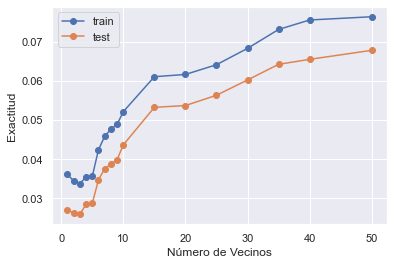

In [476]:
plt.plot(k_vecinos,lista_accuracy_train,'o-',label='train' )
plt.plot(k_vecinos,lista_accuracy_test,'o-',label='test')
plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('Exactitud')

SEGUIMOS CON ARBOL DE DESICIÓN...

In [479]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(max_depth = 30, random_state=42)

In [480]:
clf_tree.fit(X_train,y_train)

y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)

In [481]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print('Porcentaje de aceirtos sobre el set de entrenamiento:', train_acc)
print('Porcentaje de aceirtos sobre el set de evaluación:',test_acc)

Porcentaje de aceirtos sobre el set de entrenamiento: 0.09925413926260293
Porcentaje de aceirtos sobre el set de evaluación: 0.08421788858718011


In [482]:
confusion_matrix(y_train, y_train_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 7]], dtype=int64)

In [483]:
confusion_matrix(y_test, y_test_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

Optimizando la profunidad del modelo

In [484]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10]

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad
    clf = DecisionTreeClassifier(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

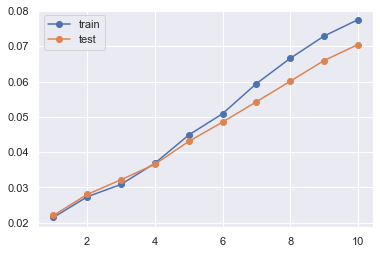

In [485]:
plt.plot(max_depths,lista_accuracy_train,'o-',label='train' )
plt.plot(max_depths,lista_accuracy_test,'o-',label='test')
plt.legend()

Cuadro comparando los errores cuadrados medios, y los r2 el mejor fue el arbol de decisión

Tabla A: **Cuadro de Resultados de Metricas**

|Modelo      | R2    |R2 ajus | RMES train| RMES test|
|:-----------|:-----:|:------:|:---------:|---------:|
|L- Regre MV |0.55169|0.55668 |199173     |202449    |
|Arbol MV    |0.90351|0.903504|52460      |149406    |
|Knn MV      |0.86460|0.864595|77925      |161757    |
|L-Regre 1V  |0.47118|0.47117 |216861     |218633    |
|Arbol 1V    |0.6155 |0.61558 |177385     |202723    |
|Knn 1V      |0.54477|0.544773|243873     |260246    | 




**Definición de Metricas**

Definimos entonces dos metricas que se subdividen en dos para evaluar los modelos, que serán el R cuadrado y el R cuadrado ajustado, el cual, entre **más cerca a 1 mejor resultado tiene el modelo**.

Por otro lado, se medirá la Raíz del Error Cuadrado Promedio, por sus siglas en ingles RMSE, el cual, por ser metricas de error a **más bajo o cerca a cero, mejor regresor será**.

**#PRUEBA**




In [488]:
lista = [2,4,2,200,150]
lista = np.array(lista)
lista = lista.reshape(1,-1)

In [489]:
tree_regressor1.predict(lista)

array([375000.])

Una propiedad con dos ambientes, 4 dormitorios, 2 baños, 200 metros de área total y 150 metros en área construida, ubicado en la Capital federal puede tener un costo de $375.000 dólares americanos

**En conclusión**, el mejor modelo para predecir el precio de una propiedad según los datos dados es el Modelo de Arboles con regresión. En la Tabla A, se refiere al modelo denominado Arbol MV (MV : Multi-Variable), con el mejor R cuadrado y menor error cuadratico medio de todos los modelos. 

In [490]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 114488 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   start_date             114488 non-null  object 
 1   fecha_Baja             114488 non-null  object 
 2   fecha_Alta1V           114488 non-null  object 
 3   latitud                114488 non-null  float64
 4   longitud               114488 non-null  float64
 5   país                   114488 non-null  object 
 6   provincia              114488 non-null  object 
 7   ciudad                 114488 non-null  object 
 8   ambientes              114488 non-null  float64
 9   dormitorios            114488 non-null  float64
 10  baños                  114488 non-null  float64
 11  superficie_total       114488 non-null  float64
 12  superficie_construida  114488 non-null  float64
 13  price                  114488 non-null  float64
 14  currency               114488 non-nu

In [491]:
dmlC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81019 entries, 0 to 146558
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ambientes              81019 non-null  float64
 1   dormitorios            81019 non-null  float64
 2   baños                  81019 non-null  float64
 3   superficie_total       81019 non-null  float64
 4   superficie_construida  81019 non-null  float64
 5   price                  81019 non-null  float64
dtypes: float64(6)
memory usage: 4.3 MB


**Ser crítico/a con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?**


Hay factores que insiden en el precio de una propiedad que en el dataset no tiene información. Cómo es el "Sector" donde están ubicados las propiedades, si es alejado o cerca de la capital, si esta cerca de un Centro Comercial o mall, si hay un hospital cerca, un centro de recreación entre otras variables que pueden influir en el precio del inmueble. Sin mencionar la valorización de los mismos y el valor sentimental del propietario. Esta información, podria ayudar al modelo a tener encuenta estas variables para predecir mejor.

Preocupa el hecho de que el mejor modelo tenga encuenta TODAS las variables para tener un buen performance, esto hace pensar que el modelo puede estar sobreajustado y no este generalizando bien. Lo cual, supone un problema a la hora de ingresar nuevas variables. El R cuadrado sugiere que puede ser un buen modelo pero hay que profundizar más para ver en donde el modelo puede mejorar.